## Business Case for PRCL-0017


### Telecom – Churn Rate ML

## Business Case:

- Due to new   players in the market, telecom industry has become very competitive and retaining customers becoming a challenge.
  In spite of reducing tariffs and promoting more offers, the churn rate ( percentage of customers migrating to competitors) is well above 10%.
  Client wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry.

## PROJECT GOAL

- Help the client with their use cases with ML
- 1. Understanding the variables that are influencing the customers to migrate.
- 2. Creating Churn risk scores that can be indicative to drive retention campaigns.
- 3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers,help to identify possible CHURN-FLAG YES customers and provide more attention in customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority for quick resolutions any questions they may have etc.,


# ***Steps:***
- Step 1: Importing necessary Libraries and Data Set
- Step 2: Domain Analysis
- Step 3: Basic Checks
- Step 4: Exploratory data analysis (EDA)
- Step 6: Data Preprocessing
- Step 6: Feature Engineering
- Step 7: Model Building
- Step 8: Conclusion

# ***Step 1: Importing necessary Libraries and Data Set***

In [ ]:
# import libraries
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
data = pd.read_sql_query("select * from telecom_churn_data",connection)
pd.set_option('display.max_columns',None)
data.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Insight
- The dataset contains 4617 rows and 21 columns


### Renaming all the columns.

In [ ]:
data.rename(columns={'columns1':'State','columns2':'Account Length','columns3':'Area Code','columns4':'Phone',
'columns5':'International Plan','columns6':'VMail Plan','columns7':'VMail Message','columns8':'Day Mins',
'columns9':'Day Calls','columns10':'Day Charge','columns11':'Eve Mins','columns12':'Eve Calls','columns13':'Eve Charge',
'columns14':'Night Mins','columns15':'Night Calls','columns16':'Night Charge','columns17':'International Mins',
'columns18':'International calls','columns19':'International Charge','columns20':'CustServ Calls',
'columns21':'Churn'},inplace =True)

# ***Step 2: Domain Analysis***

1- State: the US state in which the customer resides, indicated by a two-letter abbreviation

2- Account Length: the number of days that this account has been active

3- Area Code: the three-digit area code of the corresponding customer’s phone number

4- Phone: the remaining seven-digit phone number

5- International Plan: whether the customer has an international calling plan: yes/no

6- VMail Plan: whether the customer has a voice mail feature: yes/no

7- VMail Message: presumably the average number of voice mail messages per month

8- Day Mins: the total number of calling minutes used during the day

9- Day Calls: the total number of calls placed during the day

10- Day Charge: the billed cost of daytime calls

11- Eve Mins: the total number of calling minutes used during the evening

12- Eve Calls: the total number of calls placed during the evening

13- Eve Charge: the billed cost of evening time calls

14- Night Mins: the total number of calling minutes used during the night

15- Night Calls: the total number of calls placed during the night

16- Night Charge: the billed cost of nighttime calls

17- Intl Mins: the total number of international minutes

18- Intl Calls: the total number of international calls

19- Intl Charge: the billed cost for international calls

20- CustServ Calls: the number of calls placed to Customer Service

21- Churn: whether the customer left the service?: true/false

# ***Step 3: Basic Checks***
- Churn rate, sometimes known as attrition rate, is the rate at which customers stop doing business with a company over a given period of time. Churn may also apply to the number of subscribers who cancel or don't renew a subscription.

In [ ]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
data.tail()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.80,126.8,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [ ]:
data.shape

(4617, 21)

In [ ]:
# Converting the data type from object to int64

data['Account Length']=data['Account Length'].astype("int64")
data['Area Code']=data['Area Code'].astype("int64")
data['VMail Message']=data['VMail Message'].astype("int64")
data['Day Calls']=data['Day Calls'].astype("int64")
data['Eve Calls']=data['Eve Calls'].astype("int64")
data['Night Calls']=data['Night Calls'].astype("int64")
data['International calls']=data['International calls'].astype("int64")
data['CustServ Calls']=data['CustServ Calls'].astype("int64")


In [ ]:
# Converting the data type from object to float64

data['Day Mins']=data['Day Mins'].astype("float64")
data['Day Charge']=data['Day Charge'].astype("float64")
data['Eve Mins']=data['Eve Mins'].astype("float64")
data['Eve Charge']=data['Eve Charge'].astype("float64")
data['Night Mins']=data['Night Mins'].astype("float64")
data['Night Charge']=data['Night Charge'].astype("float64")
data['International Mins']=data['International Mins'].astype("float64")
data['International Charge']=data['International Charge'].astype("float64")

In [ ]:
data.dtypes

State                    object
Account Length            int64
Area Code                 int64
Phone                    object
International Plan       object
VMail Plan               object
VMail Message             int64
Day Mins                float64
Day Calls                 int64
Day Charge              float64
Eve Mins                float64
Eve Calls                 int64
Eve Charge              float64
Night Mins              float64
Night Calls               int64
Night Charge            float64
International Mins      float64
International calls       int64
International Charge    float64
CustServ Calls            int64
Churn                    object
dtype: object

In [ ]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account Length,4617.0,100.645224,39.597194,1.00,74.00,100.00,127.00,243.00
Area Code,4617.0,437.046350,42.288212,408.00,408.00,415.00,510.00,510.00
VMail Message,4617.0,7.849903,13.592333,0.00,0.00,0.00,17.00,51.00
Day Mins,4617.0,180.447152,53.983540,0.00,143.70,180.00,216.80,351.50
Day Calls,4617.0,100.054364,19.883027,0.00,87.00,100.00,113.00,165.00
Day Charge,4617.0,30.676576,9.177145,0.00,24.43,30.60,36.86,59.76
Eve Mins,4617.0,200.429088,50.557001,0.00,165.90,200.80,234.00,363.70
Eve Calls,4617.0,100.179770,19.821314,0.00,87.00,101.00,114.00,170.00
Eve Charge,4617.0,17.036703,4.297332,0.00,14.10,17.07,19.89,30.91
Night Mins,4617.0,200.623933,50.543616,23.20,167.10,200.80,234.90,395.00


In [ ]:
data.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [ ]:
data['Area Code'].unique()

array([415, 408, 510])

In [ ]:
data.value_counts('Area Code')

Area Code
415    2299
408    1161
510    1157
dtype: int64

In [ ]:
data['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
data['International Plan'].unique()

array([' no', ' yes'], dtype=object)

In [ ]:
data.value_counts('International Plan')

International Plan
 no     4171
 yes     446
dtype: int64

In [ ]:
data['VMail Plan'].unique()

array([' yes', ' no'], dtype=object)

In [ ]:
data.value_counts('VMail Plan')

VMail Plan
 no     3381
 yes    1236
dtype: int64

In [ ]:
data['Churn'].unique()

array([' False.', ' True.'], dtype=object)

In [ ]:
data.Churn.value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

### Insight
- Customers left are less comparativly,so data is unbalanced.



# ***Step 4: Exploratory data analysis (EDA)***

## 4.1) Univariate

In [ ]:
data.columns.tolist()

['State',
 'Account Length',
 'Area Code',
 'Phone',
 'International Plan',
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'International Mins',
 'International calls',
 'International Charge',
 'CustServ Calls',
 'Churn']

In [ ]:
# Categorical Values with target

cat_val=['International Plan','VMail Plan','Churn','State']

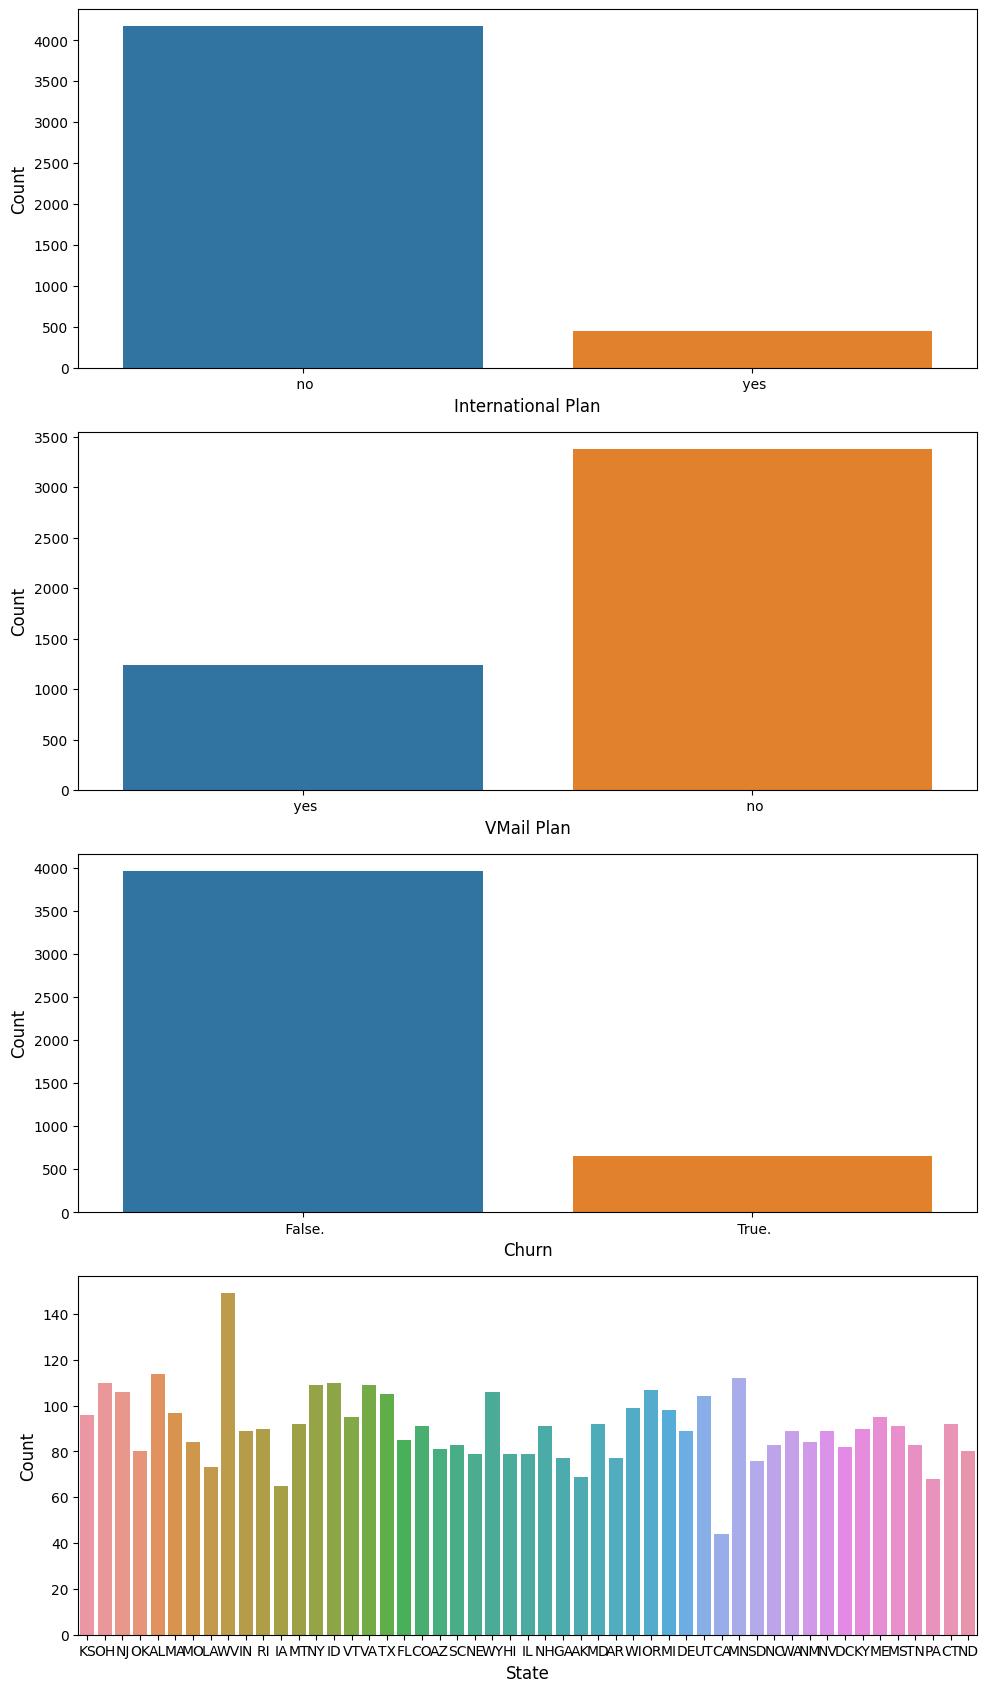

In [ ]:
plt.figure(figsize=(10,25),facecolor='white')
plotnumber=1

for column in cat_val:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.countplot(x= data[column], data=data)
        plt.xlabel(column,fontsize=12)
        plt.ylabel('Count',fontsize=12)
    plotnumber+=1
plt.tight_layout()

### Insights:
- Customers who use international plan is very less as compare to customers who don't.
- Customers who use voice mail is nearly 1/3 of customers who don't use
- Data is imbalance. Customers who churn are very less compare to non-churn users.
- Customers are from 51 different places.

In [ ]:
# Numerical values vith target

cont_val=['Account Length','Area Code','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls',
          'Eve Charge', 'Night Mins', 'Night Calls','Night Charge', 'International Mins', 'International calls',
          'International Charge', 'CustServ Calls']


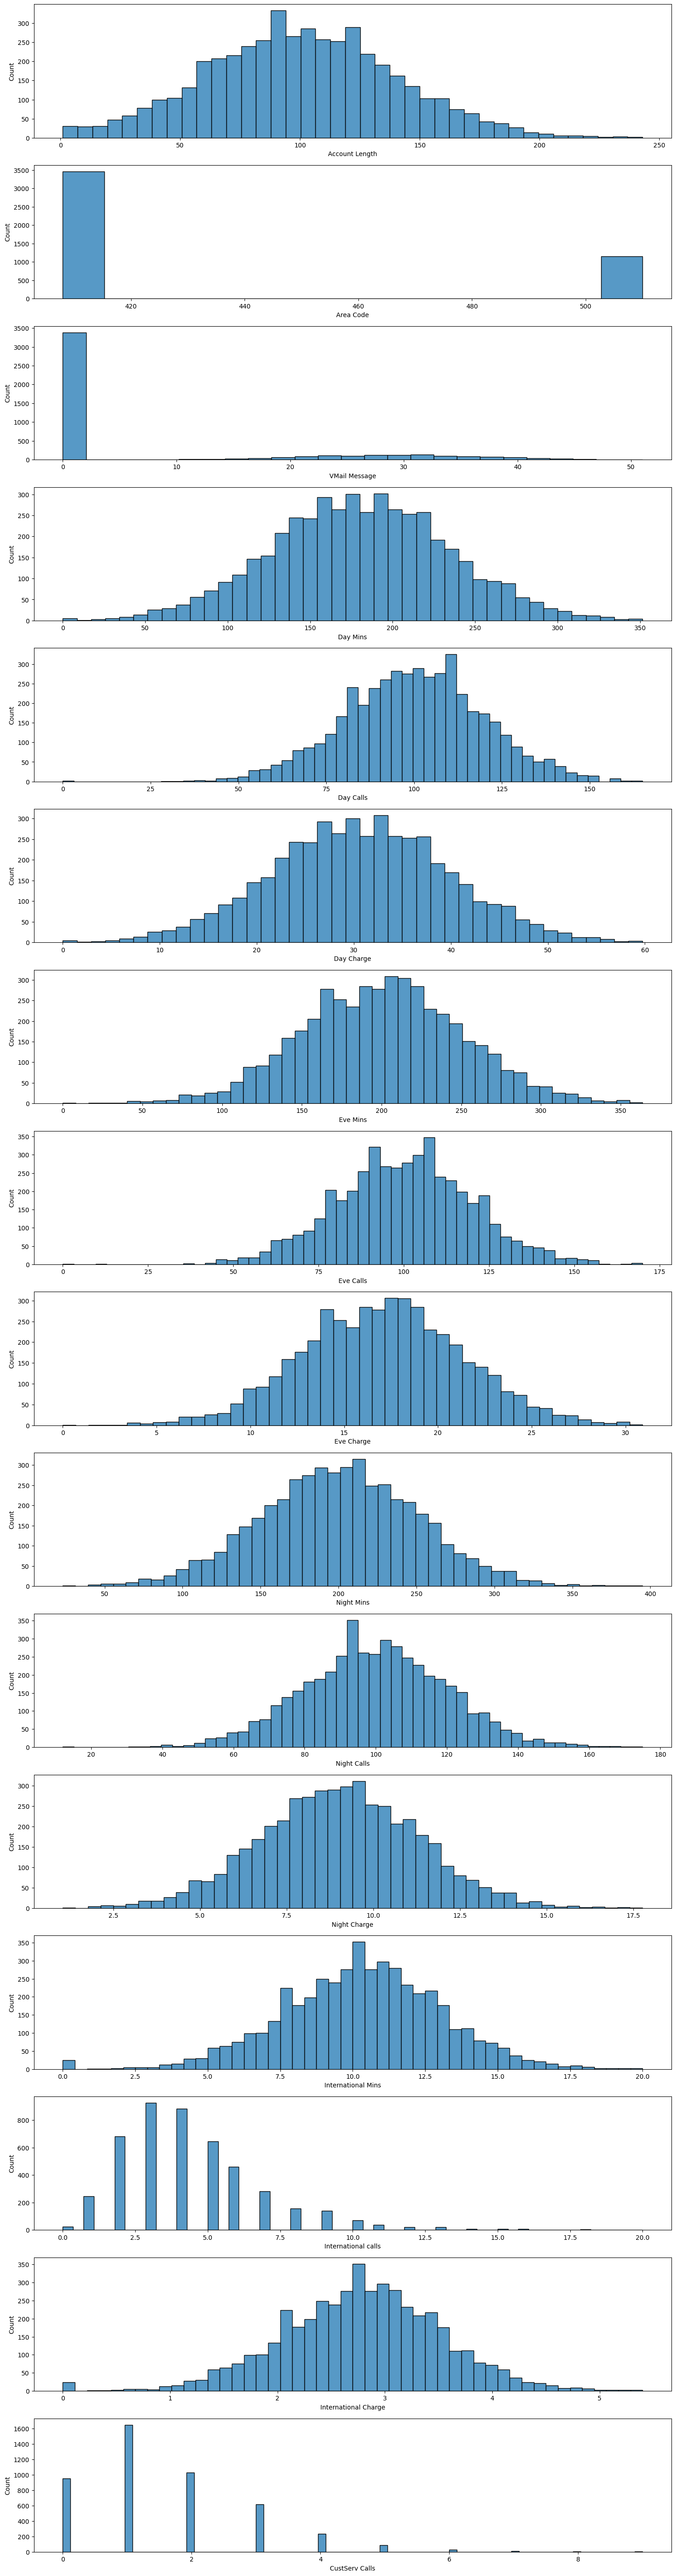

In [ ]:
plt.figure(figsize=(15,60),facecolor='white')
plotnumber=1

for column in cont_val:
    if plotnumber<=17:
        ax=plt.subplot(17,1,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Insights:
- Maximum number of people are using this account from nearly 100 days. Oldest customer is from 250 days.
- Maximum people are from area code 420
- Very few customers uses voice mail features.
- Maximum number of customers in day on call between 150-200 minutes.
- Maximum number of customers in day nearly make 90-120 calls.
- Maximum number of customers in day got charge of 30.
- Maximum number of customers in evening nearly make 90-110 calls
- Night charge is minimum.
- Average International call in between 3 to 5.
- Average use of international call in minutes is 10 minutes.
- customers maximum number of customers care call is  1 or 2.

## 4.2) Bivariate Analysis

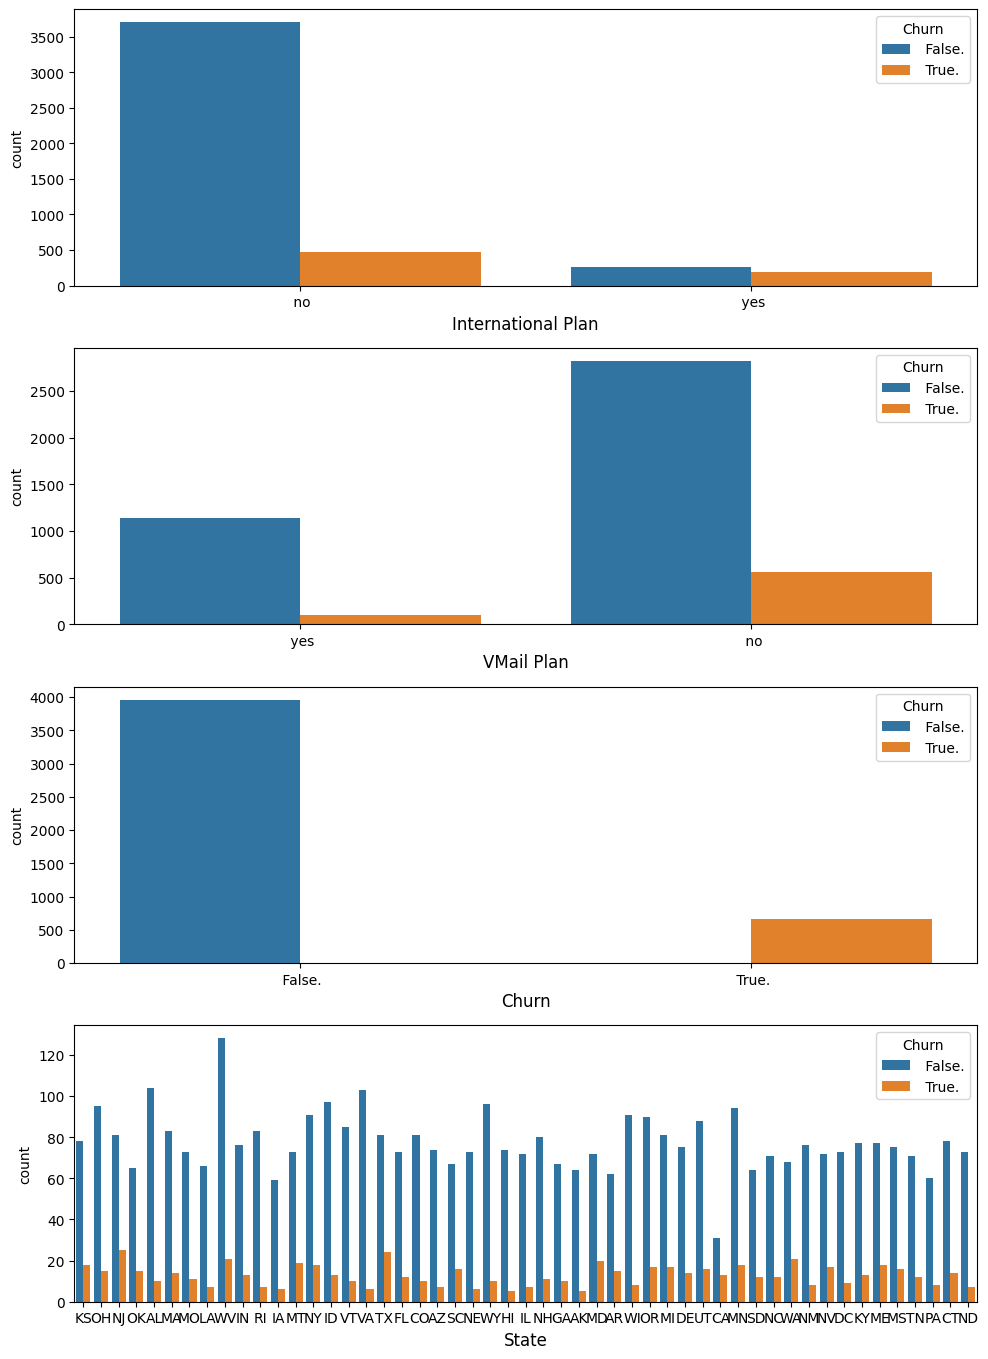

In [ ]:
# Categorical Values with Churn

plt.figure(figsize=(10,20),facecolor="white")
plotnumber=1

for column in cat_val:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.countplot(x=data[column],data=data,hue=data['Churn'])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1

plt.tight_layout()
plt.show()


### Insights:
- Customers who uses international plan have more chanve of churn.
- No effect of voice message on churn.
- Data is imbalance
- Maximum churn rate is in 'wv'.

In [ ]:
cont_val_hist = ['Account Length','Day Mins','Day Calls','Day Charge','Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'International Mins', 'International Charge','International calls',]

cont_val_count = ['Area Code','VMail Message','CustServ Calls']

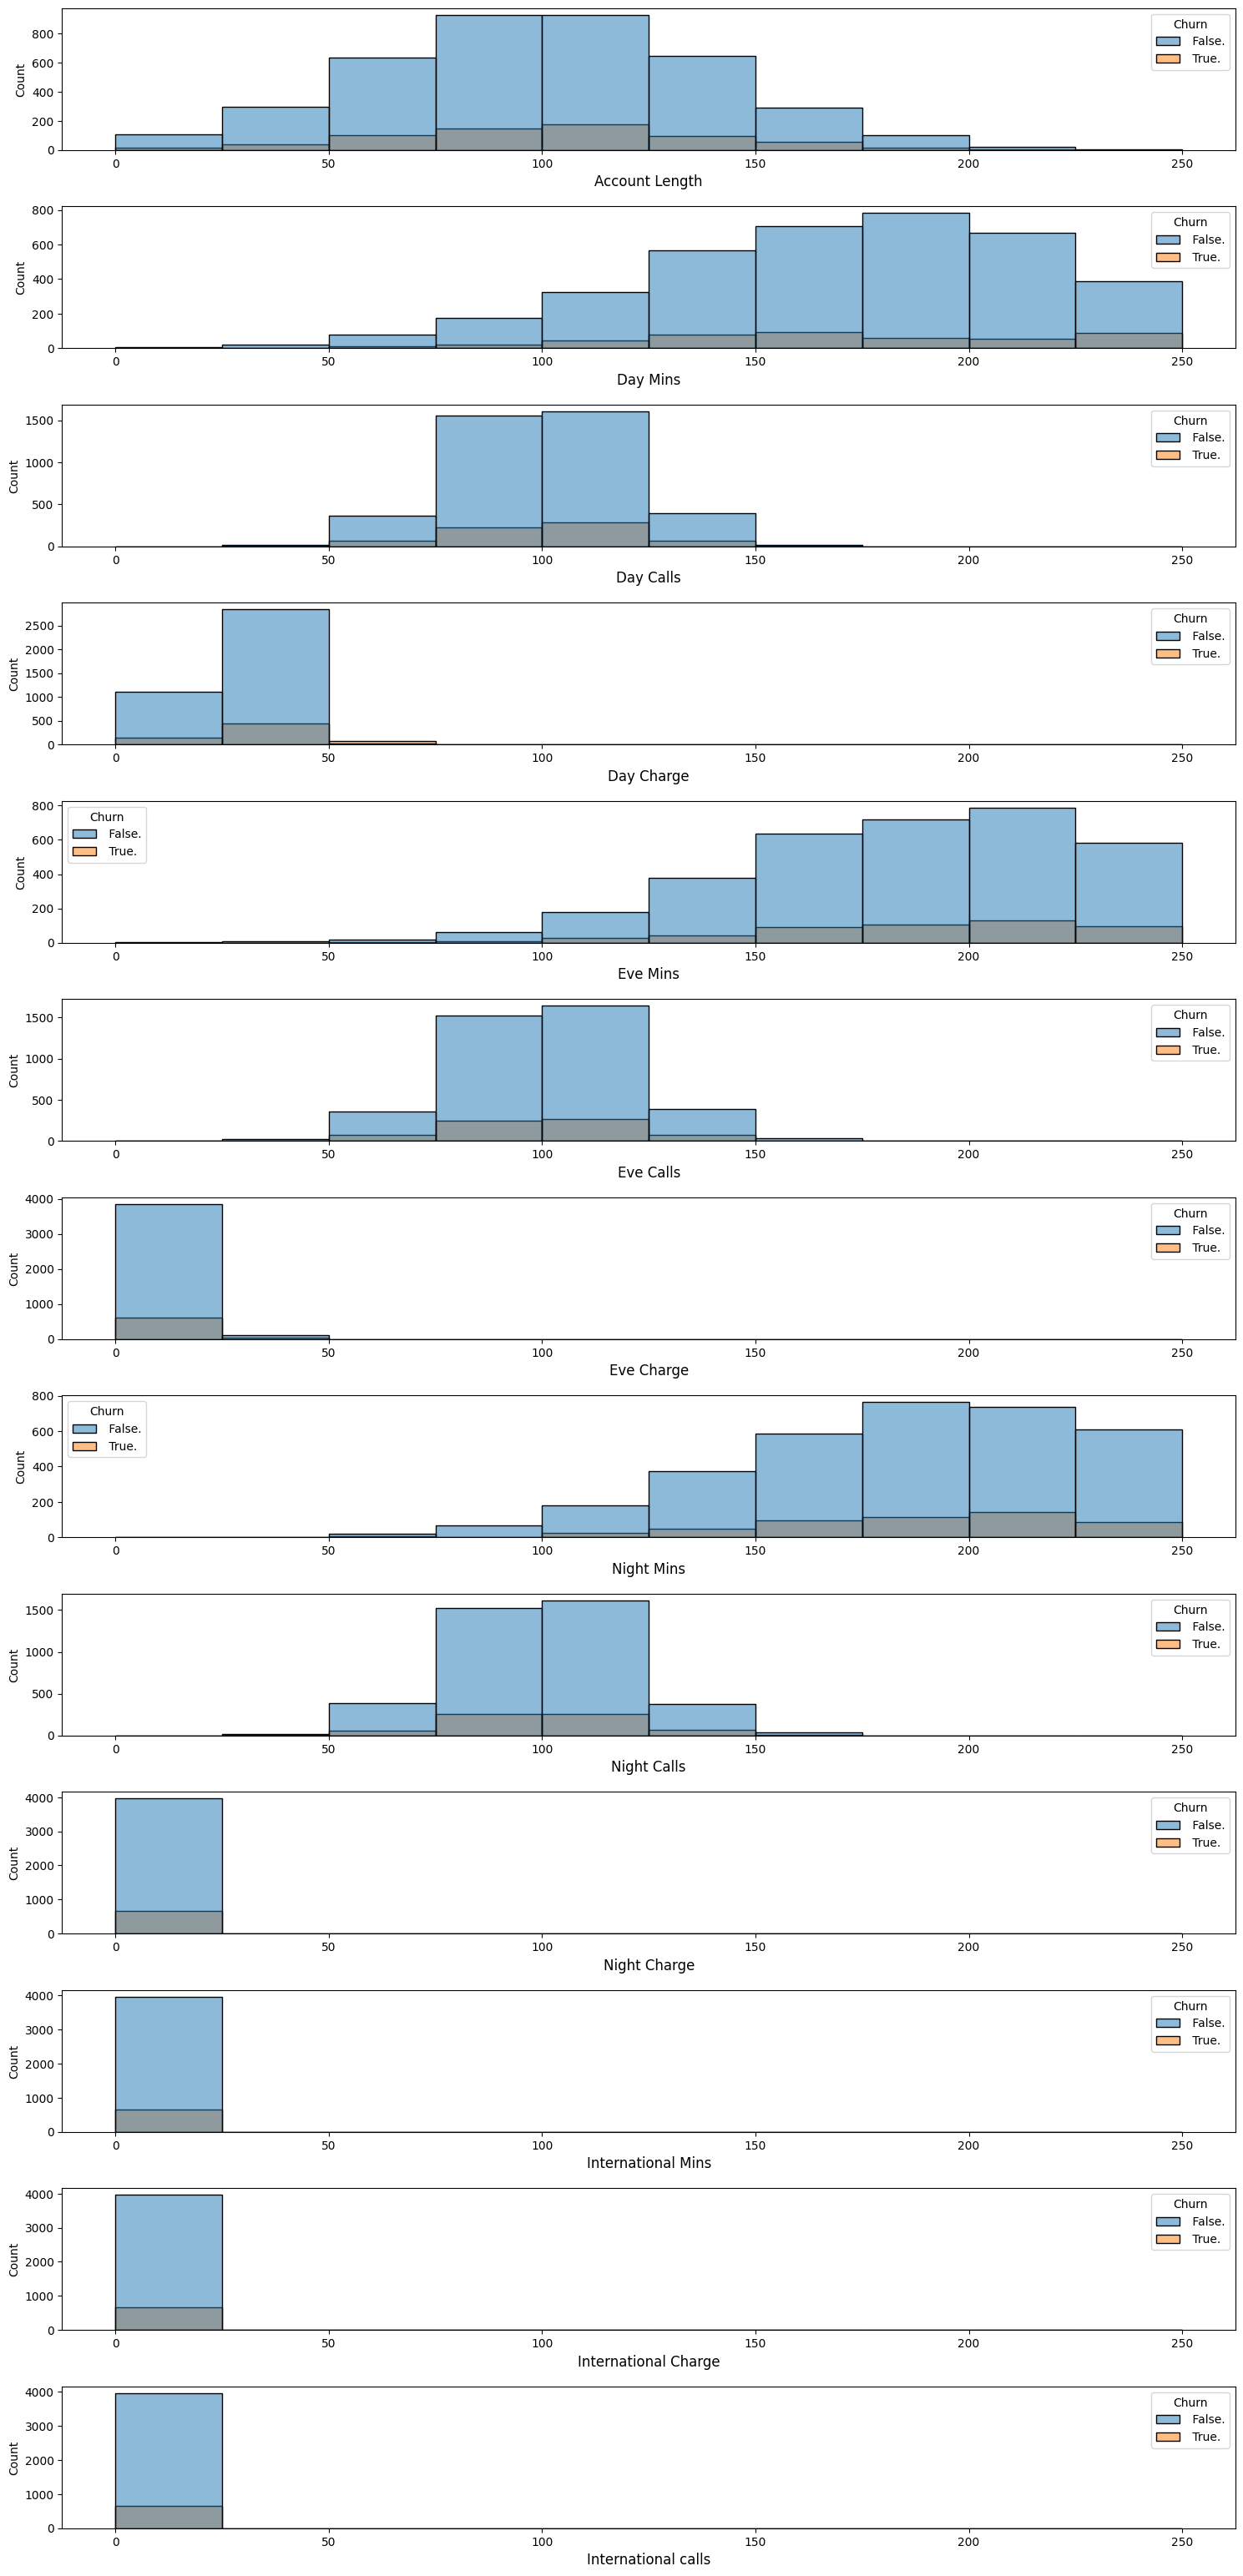

In [ ]:
plt.figure(figsize=(15,40),facecolor="white")
plotnumber=1

for column in cont_val_hist:
    if plotnumber<=17:
        ax=plt.subplot(17,1,plotnumber)
        sns.histplot(x=data[column],data=data,hue=data['Churn'],bins=[0,25,50,75,100,125,150,175,200,225,250])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1

plt.tight_layout()
plt.show()

### Insights:
- Customers who call between 100-120 have more churn rate.
- Nearly after 100 days customer start to move or churn.
- Maximum customer who got charges between 25-50 have more chance of churn
- Minimum churn is of those customer who use night charge most.

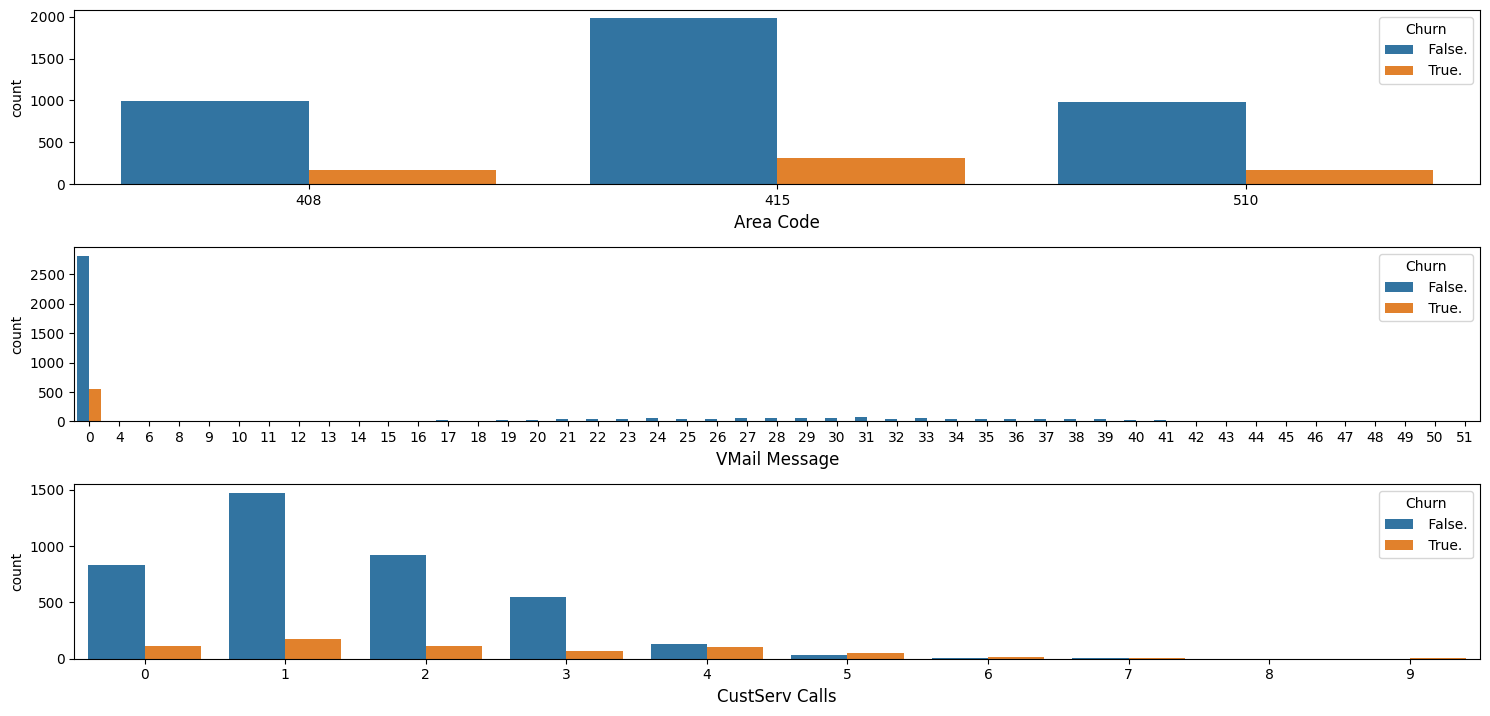

In [ ]:
# Numerical values count plot with Churn

plt.figure(figsize=(15,40),facecolor="white")
plotnumber=1

for column in cont_val_count:
    if plotnumber<=17:
        ax=plt.subplot(17,1,plotnumber)
        sns.countplot(x=data[column],data=data,hue=data['Churn'])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1

plt.tight_layout()
plt.show()

### Insights:
- Maximum churn is from area code 415.
- Nearly 1/5 of customers who uses VMail churn.
- If customers make more call to customer service means more chance of churn.

## 4.3) Multivariate

In [ ]:
sns.pairplot(data=data,hue='Churn')

Output hidden; open in https://colab.research.google.com to view.

# ***Step 5: Data Preprocessing***



In [ ]:
# Checking and Handling missing values
data.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Eve Mins                0
Eve Calls               0
Night Mins              0
Night Calls             0
International Mins      0
International calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

### Insight
- no missing values

<Axes: >

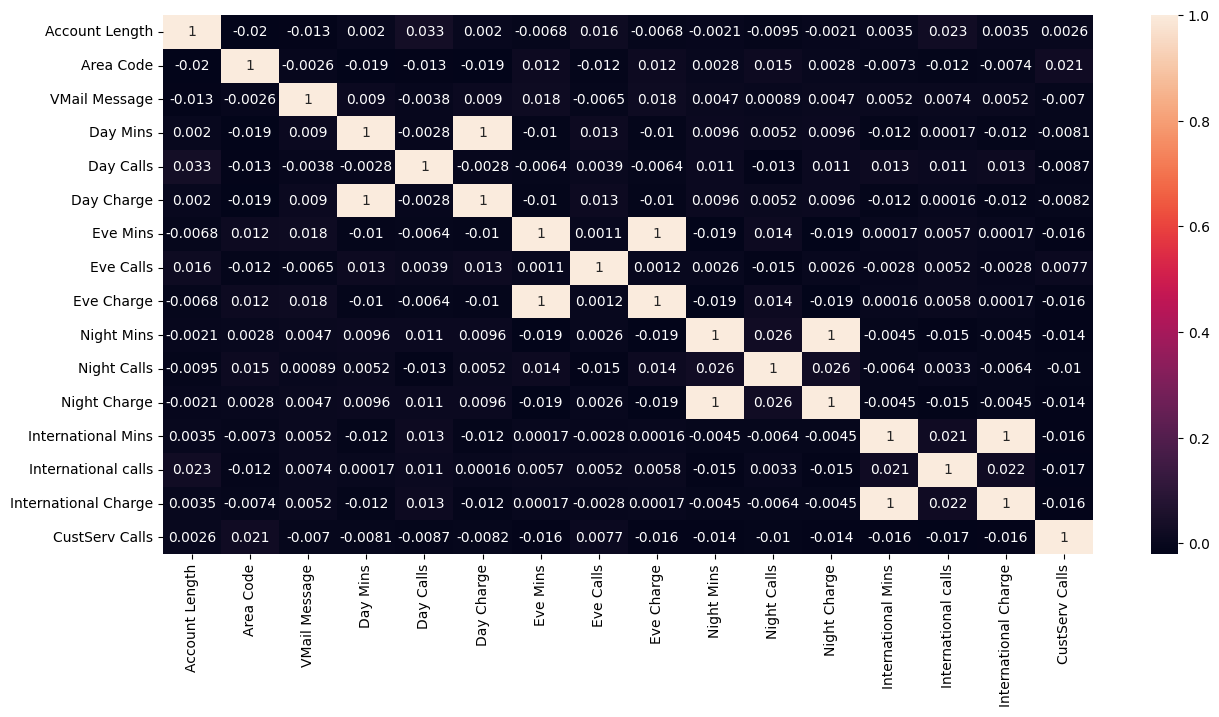

In [ ]:
#Heatmap
cor_mat=data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

### Droping high correlated columns

In [ ]:
data = data.drop(columns= (['Day Charge','Eve Charge', 'Night Charge']))

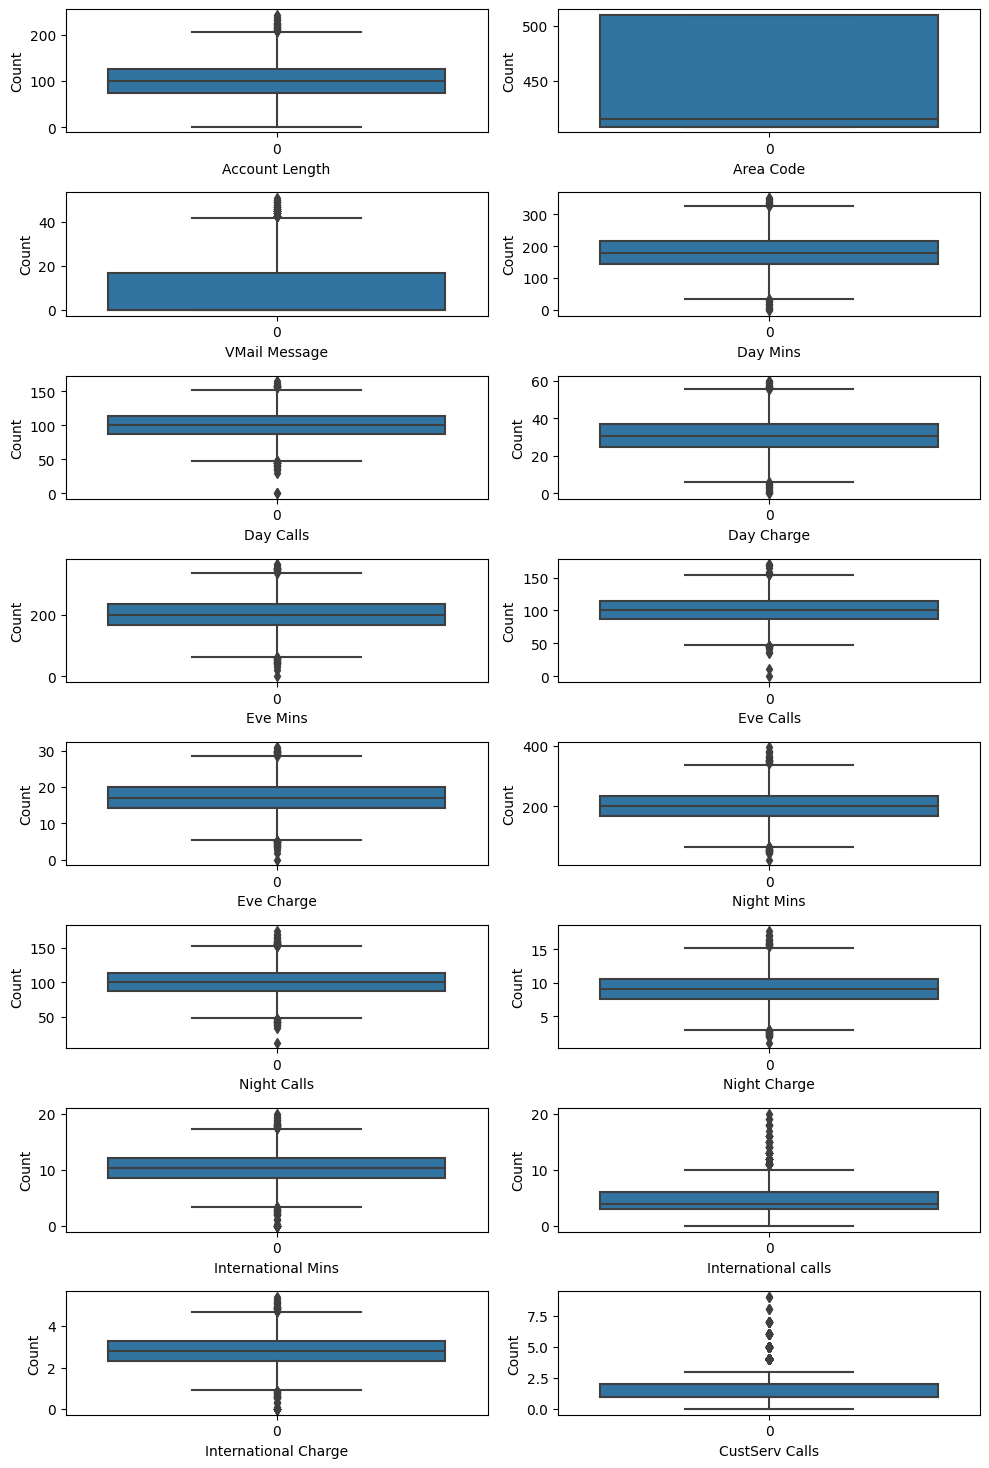

In [ ]:
# Checking and handling Outliers


plt.figure(figsize=(10,40),facecolor='white')
plotnumber=1

for column in cont_val:
    if plotnumber<=22:
        ax=plt.subplot(22,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

# ***Step: 6) Feature Engineering***


In [ ]:
data['Area Code']=data['Area Code'].astype("object")

### 6.1)  Removing unecesseary columns

In [ ]:

data = data.drop(columns=['State', 'Phone', 'Account Length'])

In [ ]:
data1.head()

,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## 6.2) Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [ ]:
data['International Plan'] = lc.fit_transform(data['International Plan'])

In [ ]:
data['VMail Plan'] = lc.fit_transform(data['VMail Plan'])

In [ ]:
data['Churn'].unique()

array([' False.', ' True.'], dtype=object)

In [ ]:
data['Churn'].replace([' False.',' True.'],[0,1],inplace=True)

In [ ]:
data['Churn'].dtypes

dtype('int64')

In [ ]:
data['Area Code'] = lc.fit_transform(data['Area Code'])

In [ ]:
data.head()

,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,International Mins,International calls,International Charge,CustServ Calls,Churn
0,1,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,2.70,1,0
1,1,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,3.70,1,0
2,1,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,3.29,0,0
3,0,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,1.78,2,0
4,1,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,2.73,3,0


# ***Step 7) Model Building***

In [ ]:
data.columns

Index(['Area Code', 'International Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls', 'Night Mins',
       'Night Calls', 'International Mins', 'International calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [ ]:
x = data.drop(columns = 'Churn')
y = data['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=.25, random_state=42)

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()

In [ ]:
x_train1= Scaler.fit_transform(x_train)
x_test1=Scaler.transform(x_test)

In [ ]:
x_train1.shape,x_test1.shape

((3462, 14), (1155, 14))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,x_train1,y_train,x_test1,y_test)

(0.8978354978354979, 0.782608695652174)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train1,y_train,x_test1,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8978354978354979
Precision -  0.782608695652174
For  KN
Accuracy -  0.8900432900432901
Precision -  0.7586206896551724
For  DT
Accuracy -  0.9064935064935065
Precision -  0.64
For  LR
Accuracy -  0.8597402597402597
Precision -  0.463768115942029
For  RF
Accuracy -  0.9541125541125541
Precision -  0.9482758620689655
For  AdaBoost
Accuracy -  0.8796536796536797
Precision -  0.59375
For  BgC
Accuracy -  0.9532467532467532
Precision -  0.9256198347107438
For  ETC
Accuracy -  0.922077922077922
Precision -  0.935064935064935
For  GBDT
Accuracy -  0.9515151515151515
Precision -  0.904
For  xgb
Accuracy -  0.9619047619047619
Precision -  0.9185185185185185


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
4,RF,0.954113,0.948276
7,ETC,0.922078,0.935065
6,BgC,0.953247,0.925620
9,xgb,0.961905,0.918519
8,GBDT,0.951515,0.904000
0,SVC,0.897835,0.782609
1,KN,0.890043,0.758621
2,DT,0.906494,0.640000
5,AdaBoost,0.879654,0.593750
3,LR,0.859740,0.463768


### ***CHURN-FLAG***

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
pred_prob = rfc.predict(x_scaled) # calculate prediction probabilities
pred_class  = np.where(pred_prob >0.5, "Yes", "No") #for binary(Yes/No) category
predictions = pd.DataFrame(pred_class, columns=['CHURN-FLAG'])
my_new_df = pd.concat([data1, predictions], axis =1)

In [ ]:
my_new_df.head(5)

,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,CHURN-FLAG
0,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,No
1,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,No
2,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,No
3,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,No
4,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,No


In [ ]:
my_new_df.tail()

,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,CHURN-FLAG
4612,2,0,1,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0,No
4613,0,0,1,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0,No
4614,0,0,1,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,0,No
4615,1,0,1,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0,No
4616,1,0,0,0,204.7,100,34.80,126.8,107,10.78,202.8,115,9.13,12.1,4,3.27,2,0,No


### Insight
  - New column CHURN-FLAG represents the predictions,so that email campaigns with lucrative
    offers can be targeted to Churn YES customers,help to identify possible CHURN-FLAG YES customers and
    provide more attention in customer touch point areas, including customer care support, request fulfilment,
    auto categorizing tickets as high priority for quick resolutions any questions they may have etc.

## Churn Risk scores

In [ ]:
# Predict churn probabilities for the test set
churn_risk_scores = log_reg.predict_proba(x_scaled)[:, 1]  # Probability of churn

# Print churn probabilities for the first few customers in the test set
print("Churn Risk Scores:")
print(churn_risk_scores[:5])

Churn Risk Scores:
[0.10101366 0.04208668 0.0850572  0.62405828 0.55750456]


In [ ]:
pred_prob = log_reg.predict(x_scaled)

predictions = pd.DataFrame(churn_risk_scores,columns=['CHURN_RISK_SCORES'])
data_final = pd.concat([my_new_df, predictions], axis =1)

In [ ]:
data_final.head()

,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,CHURN-FLAG,CHURN_RISK_SCORES
0,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,No,0.101014
1,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,No,0.042087
2,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,No,0.085057
3,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,No,0.624058
4,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,No,0.557505


### Insight
- If the churn risk score is more than 0.5 it can be an indicative to drive retention campaigns.

# ***Step 8) Conclusion***

### Top 5 models

In [ ]:
performance_df[0:5].style.hide()

Algorithm,Accuracy,Precision
RF,0.954113,0.948276
ETC,0.922078,0.935065
BgC,0.953247,0.925620
xgb,0.961905,0.918519
GBDT,0.951515,0.904000


### Random Forest have the best combination of accuracy (95.41%) and precision (94.82%) ,therefore Random Forest Classifier model is  the most suitable.


- 1. Variables that influence customers to churn are:
    - Customer Service
    - Day Charge
    - Eve Charge
    - Night Charge
    - International Charge
   
- 2. Created Churn Model:
    - If the churn risk score is more than 0.5 it can be an indicative to drive retention campaigns.
     
- 3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0)
    - New column CHURN-FLAG represents the predictions of customers who can churn.
  
  
  
  So, that email campaigns with lucrative
      offers can be targeted to Churn YES customers,help to identify possible CHURN-FLAG YES customers and
      provide more attention in customer touch point areas, including customer care support, request fulfilment,
      auto categorizing tickets as high priority for quick resolutions any questions they may have etc.


In [ ]:
data_final.to_csv('final_data', index = False)

## Saving Model

In [ ]:
import pickle

In [ ]:
pickle.dump(rfc, open('model_save', 'wb'))